# Линейное программирование и симплекс-метод

Линейное программирование - метод оптимизации моделей, в которых целевые функции и ограничения строго линейны.

Основная задача линейного программирования (ОЗЛП)-
найти неотрицательные значения переменных  x1, x2, x3 ... xn, которые бы удовлетворяли условиям-равенствам,   
      и обращали бы в максимум(минимум) линейную функцию этих переменных

## Графическое решение и симплекс-метод

###  Целевая функция
Например:  
z = 5 * x1 + 4 * x2  

### Ограничения
Например:  
6 * x1 + 4 * x2 <= 24;  
x1 + 2 * x2 <= 6  
-x1 + x2 <= 1  
x2 <= 2  
x1 >= 0  
x2 >= 0

Все ограничения преобразуются в равенства с неотрицательной правой частью.  
Все переменные неотрицательные.  
Неравенства любого типа, преобразуются в равенства, путем добавления в левую часть дополнительных переменных -  
остаточных(при '<=') или избыточных(при '>=' ).  
Иногда, переменная может принимать отрицательное значение, тогда она заменяется двумя неотрицательными переменными  
(например - число нанятых  и уволенных сотрудников)

В нашем примере, получается:  
6*x1 + 4*x2 + 1*x3 = 24  
1*x1 + 2*x2 + 1*x4 = 6
-1*x1 + 1*x2 + 1*x5 = 1
Целевая функция:  
z = 5 * x1 + 4 * x2;  z -> max.

In [1]:
import numpy as np
import time
np.set_printoptions(suppress=True)

In [2]:
a = np.array([[ 6,  4, 1, 0, 0, 0],
              [ 1,  2, 0, 1, 0, 0],
              [-1,  1, 0, 0, 1, 0],
              [ 0,  1, 0, 0, 0, 1]], dtype=float)
b = np.array([[24], [6], [1], [2]], dtype=float)
c = np.array([[5], [4], [0], [0], [0], [0]], dtype=float)

### симплекс-таблица выглядит так:

In [3]:
np.concatenate((np.concatenate((a, b), axis=1), np.concatenate((c, [[0]])).T))

array([[ 6.,  4.,  1.,  0.,  0.,  0., 24.],
       [ 1.,  2.,  0.,  1.,  0.,  0.,  6.],
       [-1.,  1.,  0.,  0.,  1.,  0.,  1.],
       [ 0.,  1.,  0.,  0.,  0.,  1.,  2.],
       [ 5.,  4.,  0.,  0.,  0.,  0.,  0.]])

матрица ограничений A mxn  m < n  
A * x = b  
все базисные решения Cmxn = n!/m!(n-m)!  
В данном случае:  
С5x2 = 5!/2!*(5 - 2)! = 10
10 - всего базисных решений, допустимых и недопустимых.
В приведенном ниже графическом методе - допустимые базисные решения - 
решения в точках:(0,0), (0,1), (1,2), (2,2), (3,1.5), (4,0)  
недопустимые: (6,0), (0,2), (0,3), (0, 6)

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline


### Ограничения  

6 * x1 + 4 * x2 <= 24;  
x1 + 2 * x2 <= 6  
-x1 + x2 <= 1  
x2 <= 2  
x1 >= 0  
x2 >= 0

### Целевая функция

z = 5 * x1 + 4 * x2  


### В "двумерном" случае, можно использовать графический метод

### графическим методом можно продемонстрировать основные положения и используемые понятия симплекс-метода

In [5]:
x = np.arange(0, 7, 1)
y = 6 - 1.5 * x
y1 = 3 - 0.5 * x
y2 = 1 + x
y3 = (21 - 5 * x) / 4
y4 = (13 - 5 * x) / 4
y5 = (18 - 5 * x) / 4

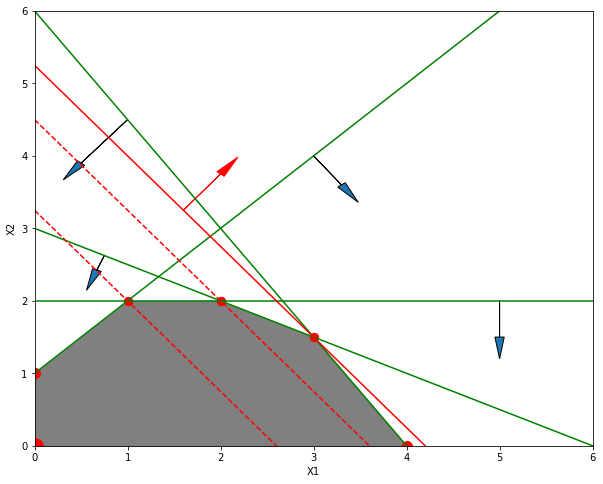

In [6]:
axes = plt.gca() 
axes.set_xlim([0, 6]) 
axes.set_ylim([0, 6]) 
axes.set_xlabel('X1')
axes.set_ylabel('X2')
fig = plt.gcf()
fig.set_size_inches(10, 8)

plt.plot(x, y, c='g')
plt.arrow(1, 4.5, -0.5, -0.6, head_width=0.1, head_length=0.3)
plt.axhline(2, c='g')
plt.arrow(5, 2, 0, -0.5, head_width=0.1, head_length=0.3)
plt.plot(x, y1, c='g')
plt.arrow(0.75, 2.625, -0.08, -0.2, head_width=0.1, head_length=0.3)
plt.plot(x, y2, c='g')
plt.arrow(3, 4, 0.3, -0.4, head_width=0.1, head_length=0.3)
xx = [0, 1, 2, 3, 4]
yy = [1, 2, 2,1.5, 0]
plt.fill_between(xx, yy, color='grey')
plt.plot(x, y3, c='red')
plt.arrow(1.6, 3.25, 0.4, 0.5, head_width=0.1, head_length=0.3, color="red")
plt.plot(x, y4, 'r--')
plt.plot(x, y5, 'r--')
plt.scatter(2, 2, s=70, c='r')
plt.scatter(4, 0, s=100, c='r')
plt.scatter(3, 1.5, s=70, c='r')
plt.scatter(0, 0, s=240, c='r')
plt.scatter(0, 1, s=100, c='r')
plt.scatter(1, 2, s=70, c='r')

In [7]:
# серая область - область допустимых значений.
# Зеленые линии - ограничения
# Красная линия - целевая функция, оптимальное значение
# Пунктирная красная линия - целевая функция при разных базисных значениях x1 и x2
# Красные точки - базисные решения
# в дальнейшем, будет приведен расчет данного примера модифицированным симплекс-методом, 
# но к оптимальному значению целевая функция будет следовать "другим путем", 
# по базисным решениям (x1, x2), принимающим значения (0,0), (0,4), (3, 1.5)

Разновидности симплекс-метода.      
Приблизительная классификация:   
1) По критериям оптимальности, подразделяется на:   
    - классический, метод Данцинга. (вводится та переменная, которая дает наиболее предпочтительную приведенную стоимость, среди всех небазисных переменных).  
    - алгоритм наибольшего улучшения. (вводится та переменная, которая дает наибольшее суммарное улучшение объективной функции, среди всех небазисных переменных). 
    - метод наиболее крутого ребра.(вводится та переменная, которая дает наилучшую приведенную стоимость, среди всех небазисных переменных). 
    - гибридный метод(на первых итерациях - классический метод,   
                      с возрастанием числа итераций - метод наиболее крутого ребра).  
2) По критериям допустимости:  
    - Прямой симплекс-алгоритм.  
        (Начальное базисное решение всегда допустимое, но не оптимальное, успешно выполненные итерации   
        сохраняют условие допустимости и обеспечивают продвижение в направлении оптимума).
    - Двойственный симплекс-алгоритм.
        (Начинается с недопустимого решения, но лучшего, чем оптимальное, и предполагает движение в направлении  
        достижения допустимости, при сохранении оптимальности).  
        В сочетании с методом наиболее крутого ребра - один из наиболее популярных методов.  
3) По способу построения симплекс-таблицы:
    - Табличный метод ( Построение симплекс-таблицы, на основании таблицы, из предыдущей итерации.  
        Не использует разреженность матриц, накапливаются ошибки округления, большее количество вычислений).
    - Модифицированный симплекс-алгоритм.(Вычисления, с использованием матричной алгебры.)  
4) Барьерный метод, или алгоритм внутренней точки (метод Кармаркара).
        - (в отличие от симплекс-алгоритма, движение к оптимуму (в пределе),   
        выполняется по внутренним областям пространства допустимых решений.
        Имеет полиномиальную сложность, симплекс-алгоритмы - экспоненциальную.  
        Не ищет угловые точки пространства допустимых решений - используется, в основном, для анализа   
        чувствительности оптимального решения и целочисленного программирования.

Желательна, предварительная обработка исходных данных, с целью:
    - сокращения размеров модели, за счет выявления и удаления избыточных ограничений, подстановки переменных.   
    - Масштабирование коэффициентов модели.

##### Будет реализован табличный симплекс-метод, основанный на методе последовательного исключения переменных методом Жордана-Гаусса. Дано краткое объяснение симплекс-метода. Данный метод будет реализован без использования библиотеки  numpy, отдельно для минимизации и максимизации целевой функции( совместно, будет реализовано в модифицированном симплекс-методе). Затем будет реализован модифицированный симплекс-метод, с использованием numpy. На примере модифицированного симплес метода будет показано использование искусственных переменных, в Двухэтапном методе.

## Табличный симплекс метод

ПРИМЕР:  
Имеем следующие ограничения. (преобразование неравенств в равенства - см. выше)   
6*x1 + 4*x2 + 1*x3 = 24  
1*x1 + 2*x2 + 1*x4 = 6
-1*x1 + 1*x2 + 1*x5 = 1
Целевая функция:  
z = 5 * x1 + 4 * x2;  z -> max.

In [8]:
# Записываем симплекс-таблицу.
table = np.concatenate((np.concatenate((a, b), axis=1), np.concatenate((c * -1, [[0]])).T))
table

array([[ 6.,  4.,  1.,  0.,  0.,  0., 24.],
       [ 1.,  2.,  0.,  1.,  0.,  0.,  6.],
       [-1.,  1.,  0.,  0.,  1.,  0.,  1.],
       [ 0.,  1.,  0.,  0.,  0.,  1.,  2.],
       [-5., -4., -0., -0., -0., -0.,  0.]])

Нижняя строчка - целевая функция, последний столбец - правые части ограничений (обозначим b).
Значение целевой функции (z)- это значение в последней строчке и последнем столбце, его нам надо максимизировать.          
Целевую функцию, запишем так: z - 5 * x1 - 4 * x2 = 0  
(отрицательные коэффициенты, при решении задачи максимизации, получаются из такой формы записи целевой функции).  
Матрица коэффициентов (a) - матрица (m-1)x(n-1)  

Базисная переменная - столбец, в котором 1 единица, остальные нули.  
В данном случае, это x3, x4, x5, x6.(второй, третий, четвертый, пятый столбцы).  
Грубо говоря, можно представить, что столбец b это количество ресурсов,   
которые у нас есть для производства товара, нижнее значение в столбце - сколько стоит данный товар,   
коэффициенты в каждом столбце (не считая коэффициент в целевой функции, последний, в нашем примере) -  
сколько каждого ресурса идет на производство товара.


Берем столбец, в котором коэффициент целевой функции наиболее отрицательный.  
Это дает наибольшее увеличение нашей целевой функции.

В нашем примере, это -5, и первый столбец коэффициентов [6, 1, -1, 0].  
Смотрим, каких ресурсов у нас меньше всего, для этого делим b (количество ресурсов) - [24, 6, 1, 2],  
на соответствующее значение потребности в ресурсах - коэффициенты в нашем первом столбце ([6, 1, -1, 0]).  
Получаем: 26/4, 6/1, 1/(-1), 2/0 -> 4, 6, -1, inf.  
    находим наименьший положительный элемент, и выделяем строку, в которой он находится, в нашем случае,  
    это 4, и 1-я строка (именно этого ресурса у нас меньше всего, для выпуска наиболее прибыльного товара).  
Первый столбец (содержащий -5), у нас становится ведущим столбцом,   
первая строка (содержащая 4, минимальный запас ресурсов) - ведущей строкой,   
элемент, на пересечении ведущей строки и столбца - ведущим элементом.
    


In [9]:
# Далее, выполняем преобразования Гаусса-Жордана.
# Ведущую строку, делем на ведущий элемент.
main_string = np.around(table[0] / 6, 4); main_string


array([1.    , 0.6667, 0.1667, 0.    , 0.    , 0.    , 4.    ])

In [10]:
# во второй строке, в ведущем столбце - стоим значение 1.
# Значит вычитаем из второй строке - первую, чтоб вместо 1, получить 0.
table[1] - main_string

array([ 0.    ,  1.3333, -0.1667,  1.    ,  0.    ,  0.    ,  2.    ])

In [11]:
# Делаем такие преобразования для всех строк, включая и строку с целевой функцией.
table[-1] - (-5)*main_string

array([ 0.    , -0.6665,  0.8335,  0.    ,  0.    ,  0.    , 20.    ])

Дальше - уже вторая итерация:  
Смотрим, какой коэффициент в строке с целевой функцией "наиболее отрицательный" и повторяем,  
пока все коэффициенты в целевой функции не станут положительными.


В итоге, получаем результирующую симплекс-таблицу с оптимальным решением,  
из которой можем посмотреть и это решение, и значение целевой функции,   
а также вычислить еще ряд полезный вещей, коротко рассмотренный в разделе - Анализ чувствительности.

##### Задача минимизации решается похоже, но, ведущий столбец, выбирается как не базисный,с наибольшим положительным коэффициентом в строке с целевой функцией, а вычисления заканчиваются тогда, когда все коэффициенты в строке с целевой функцией - неположительные.

### Реализация табличного симплекс-метода, описанного выше, без numpy.

In [12]:
# min и max - во многом дублируются, но не стал объединять, 
# т.к. в дальнейшем, будет представлен модифицированный симплекс-метод

In [13]:
def coef_from_mass(a, index):
    list_coef = []
    for item in a:
        list_coef.append(item[index])
    return list_coef

def choice_line(list_liber, list_coef):
    list_quotient = []
    for item in range(len(list_liber)):
        if list_coef[item] <= 0:
            list_quotient.append(float('inf'))
            continue
        list_quotient.append(list_liber[item] / list_coef[item])
        
    return list_quotient.index(min(list_quotient))



def subtr_line(line_one, line_two):
    return [line_one[item] - line_two[item] for item in range(len(line_one))]

def mult_line_numb(line, number):
    return [line[item] * number for item in range(len(line))]

def test_top_border(list_coef):# проверить - столбец коэффициентов проверяется или столбец свободных членов
    pozitive_list= [x for x in list_coef if x >= 0]
    if not pozitive_list:
        return True
    
def test_bottom_border(list_coef):# проверить - столбец коэффициентов проверяется или столбец свободных членов
    pozitive_list= [x for x in list_coef if x > 0]
    if not pozitive_list:
        return True

In [14]:
def simplex(a):    
    min_coef = min(a[-1])
    if min_coef >= 0:
        print('Исходный опорный план является оптимальным')
        return 1
    count = 0 # защита от зацикливания
    while (min_coef < 0): 
        if count > 100:
            print('Зацикливание вычислений')
            return 1
        min_index = a[-1].index(min_coef)
        list_coef = coef_from_mass(a[:-1], min_index)
        if test_top_border(list_coef):
            print('Верхняя граница области допустимых решений на существует')
            return 1
        
        list_liber = coef_from_mass(a[:-1], len(a[0])-1)
        current_line = choice_line(list_liber, list_coef)

        min_value = a[current_line][min_index]
        for item in range(len(a[current_line])):
            a[current_line][item] = a[current_line][item] / min_value

        number_for_div = []
        for item_line in a:
            number_for_div.append(item_line[min_index] / a[current_line][min_index])


        for item in range(len(number_for_div)):
            if item == current_line:
                continue
            a[item] = subtr_line(a[item], mult_line_numb(a[current_line], number_for_div[item]))
        min_coef = min(a[-1])
        count += 1
            
    return a


In [15]:
def view_simplex_table(a):
    table = simplex(a)
    if table is not 1:
        for item in table:
            print(item)
        print(f'\n Прибыль равняется {table[-1][-1]}')

In [16]:
a =[[6,  4, 1, 0, 0, 0, 0, 24],
    [1,  2, 0, 1, 0, 0, 0, 6],
    [-1,  1, 0, 0, 0, 1, 0, 1],
    [0,  1, 0, 0, 0, 0, 1, 2],
    [-5, -4, 0, 0, 0, 0, 0, 0]]
view_simplex_table(a)

[1.0, 0.0, 0.24999999999999997, -0.4999999999999999, 0.0, 0.0, 0.0, 3.0]
[0.0, 1.0, -0.12499999999999999, 0.7499999999999999, 0.0, 0.0, 0.0, 1.4999999999999998]
[0.0, 0.0, 0.37499999999999994, -1.2499999999999998, 0.0, 1.0, 0.0, 2.5000000000000004]
[0.0, 0.0, 0.12499999999999999, -0.7499999999999999, 0.0, 0.0, 1.0, 0.5000000000000002]
[0.0, 0.0, 0.7499999999999999, 0.5000000000000001, 0.0, 0.0, 0.0, 21.0]

 Прибыль равняется 21.0


In [17]:
def simplex_min(a):    
    max_coef = max(a[-1])
    if max_coef <= 0:
        print('Исходный опорный план является оптимальным')
        return 1
    count = 0 # защита от зацикливания
    while (max_coef > 0): 
        if count > 100:
            print('Зацикливание вычислений')
            return 1
        max_index = a[-1].index(max_coef)
        list_coef = coef_from_mass(a[:-1], max_index)
        if test_bottom_border(list_coef):
            print('Нижняя граница области допустимых решений на существует')
            return 1
        
        list_liber = coef_from_mass(a[:-1], len(a[0])-1)
        current_line = choice_line(list_liber, list_coef)

        max_value = a[current_line][max_index]
        for item in range(len(a[current_line])):
            a[current_line][item] = a[current_line][item] / max_value

        number_for_div = []
        for item_line in a:
            number_for_div.append(item_line[max_index] / a[current_line][max_index])


        for item in range(len(number_for_div)):
            if item == current_line:
                continue
            a[item] = subtr_line(a[item], mult_line_numb(a[current_line], number_for_div[item]))
        max_coef = max(a[-1])
        count += 1
            
    return a

In [18]:
a =[[ 1,  3,  1, 1, 0, 0, 0, 3],
    [ 2,   0,  4,  0, 1, 0, 0, 2],
    [ 1,   2,   0,  0, 0, 1, 0, 5],
    [ 430,460, 420,  0, 0, 0, 0, 0]]
for i in simplex_min(a):
    print(i)

[0.0, 1.0, -0.3333333333333333, 0.3333333333333333, -0.16666666666666666, 0.0, 0.0, 0.6666666666666667]
[1.0, 0.0, 2.0, 0.0, 0.5, 0.0, 0.0, 1.0]
[0.0, 0.0, -1.3333333333333335, -0.6666666666666666, -0.16666666666666669, 1.0, 0.0, 2.6666666666666665]
[0.0, 0.0, -286.6666666666667, -153.33333333333331, -138.33333333333334, 0.0, 0.0, -736.6666666666667]


## Модифицированный симплекс-метод. Реализация.

In [19]:
# ограничения
# 6 * x1 + 4 * x2 <= 24;  
# x1 + 2 * x2 <= 6  
# -x1 + x2 <= 1  
# x2 <= 2  
# x1 >= 0  
# x2 >= 0
# целевая функция
# z = 5 * x1 + 4 * x2  

In [20]:
a = np.array([[ 6,  4, 1, 0, 0, 0],
              [ 1,  2, 0, 1, 0, 0],
              [-1,  1, 0, 0, 1, 0],
              [ 0,  1, 0, 0, 0, 1]], dtype=float)
b = np.array([[24], [6], [1], [2]], dtype=float)
c = np.array([[5], [4], [0], [0], [0], [0]], dtype=float)

### симплекс-таблица выглядит так:

In [21]:
np.concatenate((np.concatenate((a, b), axis=1), np.concatenate((c, [[0]])).T))

array([[ 6.,  4.,  1.,  0.,  0.,  0., 24.],
       [ 1.,  2.,  0.,  1.,  0.,  0.,  6.],
       [-1.,  1.,  0.,  0.,  1.,  0.,  1.],
       [ 0.,  1.,  0.,  0.,  0.,  1.,  2.],
       [ 5.,  4.,  0.,  0.,  0.,  0.,  0.]])

### Берется начальное допустимое  решение:
#### в данном случае, все ограничения имеют вид <=, поэтому начальное допустимое решение будет иметь вид:

In [22]:
np.eye(4)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

 Если ограничения имеют вид >=, или == , необходимо найти искусственное начальное решение.
 Это можно сделать либо с помощью М-метода, либо двухэтапным методом.  
   
 В двухэтапном методе, исключены ошибки округления, присущие М-методу:  
      
 На первом этапе, для поиска базового решение, минимизируется функция r = R1 + R2 ...,     
 где Rx - коэффициенты, при дополнительных переменных, добавляемых при переходе от ограничений в форме == и >=,  
 к канонической форме записи задачи линейного программирования.

#### Возьмем базисные столбцы из матрицы коэффициентов, сохраним номера столбцов базиса в массиве NB, 
#### номера столбцов с свободными членами в массиве NF

In [23]:
# начальное допустимое базмсное решение известно 
# демонстрирубтся столбцы, которые мы берем в качестве базисных
def take_base(a):    
    ind = []
    count = 0
    for item in a.T:
        temp = np.unique(item)
        if ((np.any(temp == 0) and np.any(temp == 1)) and temp.sum() == 1):
            ind.append(count)
        count += 1
    return np.array(ind)  

In [24]:
NB = take_base(a); NB

array([2, 3, 4, 5])

In [25]:
a.shape[0] == NB.shape[0]

True

In [26]:
def take_free(a, NB):
    temp = set(NB)
    NF = []
    for item in range(a.shape[1]):
        if item not in temp:
            NF.append(item)
    return np.array(NF)

In [27]:
NF = take_free(a, NB); NF

array([0, 1])

In [28]:
def test_optima(row, minimax):
    if minimax == 'max':
        if np.all(row >= 0):
            print('Достигнуто оптимальное решение.')
            return -1
        else:
            return row.argmin()
    elif minimax == 'min':
        if np.all(row <= 0):
            print('Достигнуто оптимальное решение.')
            return -1
        else:
            return row.argmax()
    else:
        print("Не введен тип задачи: минимизация или максимизация.")
        return -1
    
    
def choice_line(list_liber, list_coef):
    list_quotient = []
    for item in range(len(list_liber[0])):
        if list_coef[item] <= 0:
            list_quotient.append(float('inf'))
            continue
        list_quotient.append(list_liber[0][item] / list_coef[item])
    return list_quotient.index(min(list_quotient))

def test_not_border(a):
    return np.all(a <= 0)

def mod_simplex(a, b, c, NB, NF, minimax='max'):
    while True:
        B_inv = np.linalg.inv(a[:, NB])
        xb = B_inv.dot(b)
        z = c[NB].T.dot(xb)
        row = (c[NB].T.dot(B_inv).dot(a[:, NF]) - c[NF].T).T
        col = test_optima(row, minimax)
        if col == -1:
            print('Значение целевой функции -', z)
            print('xb -', xb.T)  
            print('Simplex-table:')
            simplex_table = np.concatenate((np.concatenate((B_inv.dot(a), \
                c[NB].T.dot(B_inv.dot(a)) - c.T)), np.concatenate((xb, z))), axis=1)
            print(np.around(simplex_table, 4))   
        
            xx = [item for item in range(len(xb)) if item not in NF]
            print('x -', xb[np.around(B_inv.dot(a)[:, xx]).argmax(axis=0)].T)
            return 
        if test_not_border(a[:, col]):
            print('Задача не имеет ограниченного решения.')
            return
        line = choice_line(xb.T, B_inv.dot(a[:, col]))
        NF[col], NB[line] = NB[line], NF[col]


In [29]:
start = time.time()
mod_simplex(a, b, c, NB, NF, 'max')
stop = time.time()
print ("Время :")
print(stop - start)

Достигнуто оптимальное решение.
Значение целевой функции - [[21.]]
xb - [[3.  1.5 2.5 0.5]]
Simplex-table:
[[ 1.     0.     0.25  -0.5    0.     0.     3.   ]
 [-0.     1.    -0.125  0.75   0.     0.     1.5  ]
 [ 0.     0.     0.375 -1.25   1.     0.     2.5  ]
 [ 0.     0.     0.125 -0.75   0.     1.     0.5  ]
 [-0.    -0.     0.75   0.5    0.     0.    21.   ]]
x - [[3.  1.5]]
Время :
0.002036571502685547


### Сравнение с симплекс-методом, реализованном в библиотеке scipy

In [30]:
from scipy.optimize import linprog
start = time.time()
c = c * -1  #Функция цели
A_ub = a  # коэффициенты ограничений  
b_ub = b #   правая часть ограничений

print (linprog(c, A_ub, b_ub))
stop = time.time()
print ("Время :")
print(stop - start)

     con: array([], dtype=float64)
     fun: -20.999999999684206
 message: 'Optimization terminated successfully.'
     nit: 5
   slack: array([0.  , 0.  , 1.25, 0.25])
  status: 0
 success: True
       x: array([3.  , 1.5 , 0.  , 0.  , 1.25, 0.25])
Время :
0.0041081905364990234


Модифицированный симплекс-метод выполняет точно такие же этапы, 
как и обычный табличный метод, но в модифицированном симплекс-методе, используются матричные вычисления.
За счет этого, повышается точность вычисления элементов обратной матрицы (B_inv), 
и уменьшается проблема появления ошибок машинного округления при операциях над строками. 
    Модифицированный симплекс-метод, имеет 2 главные проблемы:
        - вычислительная точность(числовая стабильность),
         - скорость выполнения расчетов.
Вычисление обратной матрицы - повышает точность вычислений, но, одновременно, замедляет вычисления.

В модифицированном симплекс методе, используются два разных метода получения обратной матрицы (B_inv):
    - Мультипликативное представление обратной матрицы.
    - Метод LU - разложения.


In [31]:
# еще пример:
a = np.array([[1,  2, 1, 1, 0, 0],
              [3,  0, 2, 0, 1, 0],
              [1,  4, 0, 0, 0, 1]])
b = np.array([[430], [460], [420]])
c = np.array([[3], [2], [5], [0], [0], [0]])

In [32]:
np.concatenate((np.concatenate((a, b), axis=1), np.concatenate((c, [[0]])).T))

array([[  1,   2,   1,   1,   0,   0, 430],
       [  3,   0,   2,   0,   1,   0, 460],
       [  1,   4,   0,   0,   0,   1, 420],
       [  3,   2,   5,   0,   0,   0,   0]])

In [33]:
NB = take_base(a); NB

array([3, 4, 5])

In [34]:
NF = take_free(a, NB); NF

array([0, 1, 2])

In [35]:
mod_simplex(a, b, c, NB, NF, 'max')

Достигнуто оптимальное решение.
Значение целевой функции - [[1350.]]
xb - [[100. 230.  20.]]
Simplex-table:
[[  -0.25    1.      0.      0.5    -0.25    0.    100.  ]
 [   1.5     0.      1.      0.      0.5     0.    230.  ]
 [   2.      0.      0.     -2.      1.      1.     20.  ]
 [   4.      0.      0.      1.      2.      0.   1350.  ]]
x - [[100. 230.]]


In [36]:
c = c * -1 
A_ub = a
b_ub = b 
print (linprog(c, A_ub, b_ub))

     con: array([], dtype=float64)
     fun: -1349.9999984048386
 message: 'Optimization terminated successfully.'
     nit: 6
   slack: array([ 0.00000048,  0.00000049, 10.00000048])
  status: 0
 success: True
       x: array([  0.00000001,  99.99999987, 229.99999973,   0.00000005,
         0.00000002,  10.00000005])


### Минимум

In [37]:
a = np.array([[ 1,   3,  1,  1, 0, 0],
              [ 2,   0,  4,  0, 1, 0],
              [ 1,   2,  0,  0, 0, 1]])
b = np.array([[3], [2], [5]])
c = np.array([[-430], [-460], [-420], [0], [0], [0]])

In [38]:
NB = np.array([3, 4, 5])
NF = np.array([0, 1, 2])

In [39]:
mod_simplex(a, b, c, NB, NF, 'min')

Достигнуто оптимальное решение.
Значение целевой функции - [[-736.66666667]]
xb - [[0.66666667 1.         2.66666667]]
Simplex-table:
[[   0.        1.       -0.3333    0.3333   -0.1667    0.        0.6667]
 [   1.        0.        2.        0.        0.5       0.        1.    ]
 [   0.        0.       -1.3333   -0.6667   -0.1667    1.        2.6667]
 [   0.        0.     -286.6667 -153.3333 -138.3333    0.     -736.6667]]
x - [[1.         0.66666667]]


## Двухэтапный метод (введение искусственных переменных)
#### Первый этап двухэтапного метода
r = R1 + R2  -> min

In [40]:
a = np.array([[ 3,   1,   0,  1, 0, 0],
              [ 4,   3,  -1,  0, 1, 0],
              [ 1,   2,   0,  0, 0, 1]])
b = np.array([[3], [6], [4]])
c = np.array([[0], [0], [0], [1], [1], [0]])

In [41]:
NB = take_base(a); NB

array([3, 4, 5])

In [42]:
NF = take_free(a, NB); NF

array([0, 1, 2])

In [43]:
mod_simplex(a, b, c, NB, NF, 'min')

Достигнуто оптимальное решение.
Значение целевой функции - [[0.]]
xb - [[0.6 1.2 1. ]]
Simplex-table:
[[ 1.  -0.   0.2  0.6 -0.2  0.   0.6]
 [ 0.   1.  -0.6 -0.8  0.6  0.   1.2]
 [ 0.   0.   1.   1.  -1.   1.   1. ]
 [ 0.   0.   0.  -1.  -1.   0.   0. ]]
x - [[0.6 1.2]]


#### Второй этап двухэтапного метода

In [44]:
a = np.array([[ 1,   0,   0.2,  0],
              [ 0,   1,  -0.6,  0],
              [ 0,   0,   1,    1]])
b = np.array([[0.6], [1.2], [1]])
c = np.array([[-4], [-1], [0], [0]])

In [45]:
NB = take_base(a); NB

array([0, 1, 3])

In [46]:
NF = take_free(a, NB); NF

array([2])

In [47]:
mod_simplex(a, b, c, NB, NF, 'min')

Достигнуто оптимальное решение.
Значение целевой функции - [[-3.6]]
xb - [[0.6 1.2 1. ]]
Simplex-table:
[[ 1.   0.   0.2  0.   0.6]
 [ 0.   1.  -0.6  0.   1.2]
 [ 0.   0.   1.   1.   1. ]
 [ 0.   0.  -0.2  0.  -3.6]]
x - [[0.6 1.2]]


## Анализ чувствительности

Влияние изменений параметров модели на полученное оптимальное решение задачи линейного программирования.

##### Изменение значений констант в правой части неравенств ограничений (чувствительность к изменению доступности ресурсов)

##### Максимизировать
z = 30*x1 + 20*x2
##### Ограничения
2 * x1 + x2 <= 8; Условие №1  
x1 + 3 * x2 <= 8; Условие №2  
x1 >= 0; x2 >= 0

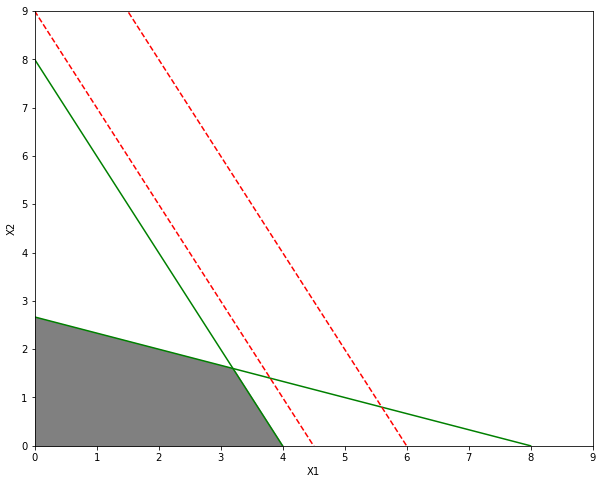

In [48]:
axes = plt.gca() 
axes.set_xlim([0, 9]) 
axes.set_ylim([0, 9]) 
axes.set_xlabel('X1')
axes.set_ylabel('X2')
fig = plt.gcf()
fig.set_size_inches(10, 8)

x = np.arange(0, 9, 1)
y1 = 8 - 2 * x
plt.plot(x, y1, c='g')
y2 = (8 - x) / 3
plt.plot(x, y2, c='g')
xx = [0, 3.2, 4]
yy = [8/3, 1.6, 0]
plt.fill_between(xx, yy, color='grey')
y3 = 9 - 2 * x
plt.plot(x, y3, 'r--')
y4 =12 - 2 * x
plt.plot(x, y4, 'r--')


In [49]:
# изменение ограничения: 2 * x1 + x2 <= 8;   Целевая функция = 128; Изменение условия № 1 стоит 14 ед..
# 2 * x1 + x2 <= 9; Целевая функция = 142;
# 2 * x1 + x2 <= 12; Целевая функция  = 184;

Информацию для определения двойственной цены(стоимости единицы ресурса) и интервал ее допустимости можно получить из симплекс таблицы.

z = 30*x1 + 20*x2

2 * x1 + x2 <= 8 + D1   
x1 + 3 * x2 <= 8 + D2   
x1 >= 0; x2 >= 0  

D1 и D2 совпадают с векторами  x3, x4  
Получаем  систему уравнений  
x1 = 3.2 + 0.6 * D1 - 0.2 * D2  
x2 = 1.6 - 0.2 * D2 + 0.4 * D2  
z = 128 + 14 * D1 + 2 * D2  

из которой рассчитываются двойственные цены и интервалы допустимости

##### Изменение коэффициентов целевой  функции (чувствительность к изменению уровня затрат и доходов)

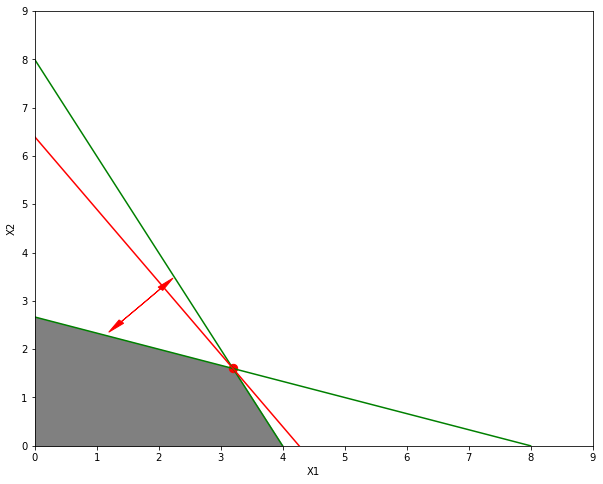

In [50]:
axes = plt.gca() 
axes.set_xlim([0, 9]) 
axes.set_ylim([0, 9]) 
axes.set_xlabel('X1')
axes.set_ylabel('X2')
fig = plt.gcf()
fig.set_size_inches(10, 8)

x = np.arange(0, 9, 1)
y1 = 8 - 2 * x
plt.plot(x, y1, c='g')
y2 = (8 - x) / 3
plt.plot(x, y2, c='g')
xx = [0, 3.2, 4]
yy = [8/3, 1.6, 0]
plt.fill_between(xx, yy, color='grey')
y3 = (128 - 30 * x) / 20
plt.plot(x, y3, c='r')
plt.scatter(3.2, 1.6, s=70, c='r')
plt.arrow(1.8, 3, 0.23, 0.25, head_width=0.1, head_length=0.3, color="red")
plt.arrow(1.8, 3, -0.40, -0.43, head_width=0.1, head_length=0.3, color="red")

Оптимальное значение находится в красной точке. 
Изменение в уровне затрат и расходов (коэффициентов целевой функции), приводят  к изменению наклона прямой целевой функции (красной линии). Оптимальное решение будет оставаться в красной точке, пока прямая целевой функции будет находится между прямыми ограничений(зелеными).

Для определения приведенной стоимости берутся результаты вычисления целевой функции из симплекс таблицы:   
z = 128 - 14 * x3 - 2 * x4

Определение интервала оптимальности тоже проводится с помощью целевой функции и рассчитанной симплекс-таблицы:  
z = (30 + d1) * x1 + (20 + d2) * x2.  
Из d1 и d2 и значений симплекс-таблицы составляются условия одновременной оптимальности,   
соответствующее небазисным векторам, в данном случае x3, x4. Подробно не буду рассчитывать. Описано в "Исследование операций", Хэмди А. Таха, 10-е издание.

## Особые случаи:

### Область допустимых значений не существует.

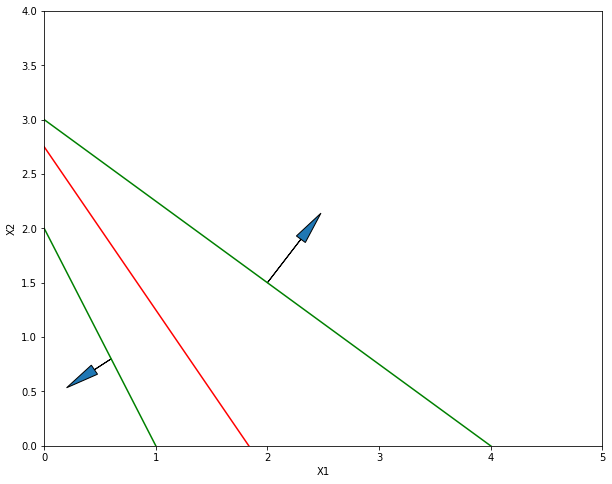

In [51]:
axes = plt.gca() 
axes.set_xlim([0, 5]) 
axes.set_ylim([0, 4]) 
axes.set_xlabel('X1')
axes.set_ylabel('X2')
fig = plt.gcf()
fig.set_size_inches(10, 8)

x = np.arange(0, 6, 1)
y1 = 2 - 2 * x
plt.plot(x, y1, c='g')
y2 = (12 - 3 * x) / 4
plt.plot(x, y2, c='g')
y3 = (5.5 - 3 * x) /2
plt.plot(x, y3, 'r')
plt.arrow(2, 1.5, 0.3, 0.4, head_width=0.1, head_length=0.3)
plt.arrow(0.6, 0.8, -0.15, -0.1, head_width=0.1, head_length=0.3)

Зеленые линии - ограничения, красная - целевая функция.

Такая ситуация не может возникнуть, если все ограничения -'<='  
В других случаях, используются искусственные переменные,  
и в оптимальном решении будет присутствовать хотя бы одна положительная искусственная переменная.
  
  Это говорит о том, что задача плохо сформулирована.

### Вырожденный базис

Если встретится некоторое базисное решение, допустимое или нет, 
в котором хотя бы одна базисная переменная равна нулю - 
это признак того, что задача вырождена.
если 0 встречается в столбце b, и мы выберем в качестве ведущей строки, эту строку(содержащую 0 в b),
то значение функции z останется без изменений, и алгоритм может зацикливаться.

Для решения этой ситуации используется 1. - метод Данцинга, добавления к правым частям ограничений (столбец b),
искусственных малых величин, из-за чего, совпадающие "вершины" разводятся.
2- с помощью двойственного симплекс-метода.

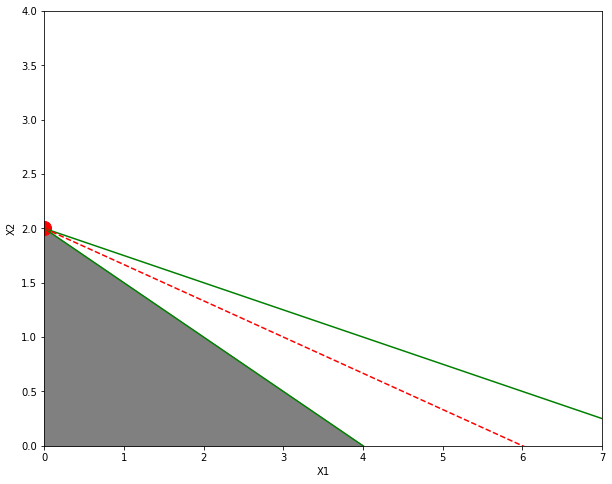

In [52]:
axes = plt.gca() 
axes.set_xlim([0, 7]) 
axes.set_ylim([0, 4]) 
axes.set_xlabel('X1')
axes.set_ylabel('X2')
fig = plt.gcf()
fig.set_size_inches(10, 8)

x = np.arange(0, 9, 1)
y1 = (4 - x) / 2
plt.plot(x, y1, c='g')
y2 = (8 - x) / 4
plt.plot(x, y2, c='g')
xx = [0, 4]
yy = [2, 0]
plt.fill_between(xx, yy, color='grey')
plt.scatter(0, 2, s=200, c='r')
y3 = (18 - 3 * x) / 9
plt.plot(x, y3, 'r--')


In [53]:
# серая область - область допустимых значений.
# Зеленые линии - ограничения
# Пунктирная красная линия - целевая функция

### Область допустимых решений не ограничена

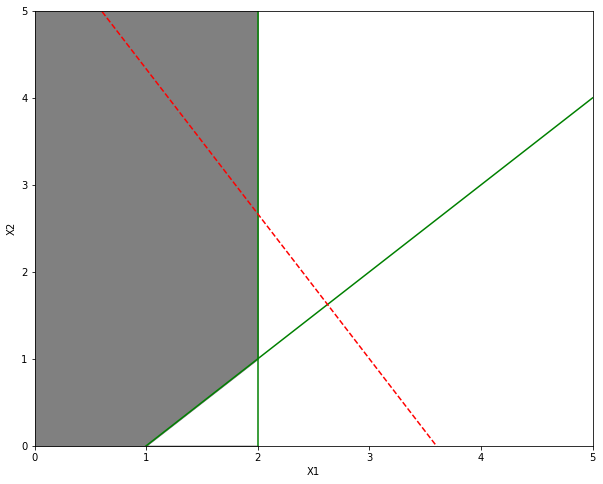

In [54]:
axes = plt.gca() 
axes.set_xlim([0, 5]) 
axes.set_ylim([0, 5]) 
axes.set_xlabel('X1')
axes.set_ylabel('X2')
fig = plt.gcf()
fig.set_size_inches(10, 8)

x = np.arange(0, 6, 1)
plt.axvline(2, c='g')
y1 = (x - 1)
plt.plot(x, y1, c='g')
xx = [0, 0, 2, 2, 1]
yy = [0, 5, 5, 1, 0]
plt.fill_between(xx, yy, color='grey')
y3 = (18 - 5 * x) / 3
plt.plot(x, y3, 'r--')

In [55]:
# серая область - область допустимых значений.
# Зеленые линии - ограничения
# Пунктирная красная линия - целевая функция

Это свидетельствует о том, что модель разработана недостаточно корректно.  
Пространство допустимых значений не ограничено, по крайней мере, по одному направлению.

###  Альтернативные  оптимальные решения
Тоже возможно зацикливание (зацикливание возможно не только в вырожденных задачах).
При одинаковой Z - оптимальное решение будет во всех решениях внутри цикла.

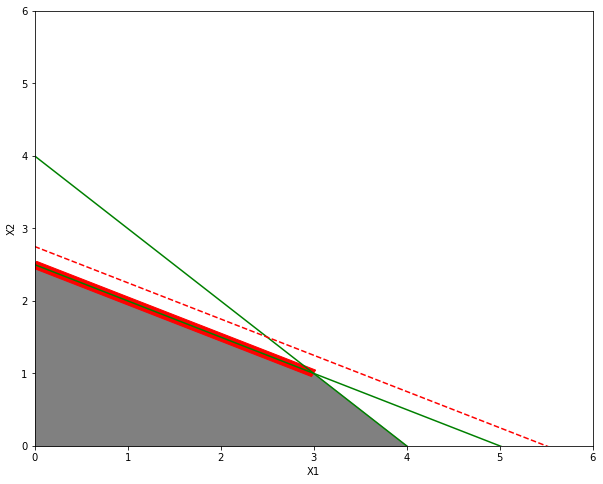

In [56]:
axes = plt.gca() 
axes.set_xlim([0, 6]) 
axes.set_ylim([0, 6]) 
axes.set_xlabel('X1')
axes.set_ylabel('X2')
fig = plt.gcf()
fig.set_size_inches(10, 8)

x = np.arange(0, 9, 1)
y1 = (5 - x) / 2 
plt.plot(x, y1, c='g')
y2 = (4 - x)
plt.plot(x, y2, c='g')
xx = [0, 0, 3, 4]
yy = [0, 2.5, 1, 0]
plt.fill_between(xx, yy, color='grey')
y3 = (11 - 2 * x) / 4
plt.plot(x, y3, 'r--')
plt.arrow(0, 2.5, 3, -1.5, color='red', width=0.1, head_width=0.1, head_length=0.0)
# plt.arrow??

In [57]:
# серая область - область допустимых значений.
# Зеленые линии - ограничения
# Пунктирная красная линия - целевая функция
# Толстая красная линия  - множество одинаковых оптимальных решений.

гиперплоскость(в нашем случае прямая), представляющая целевую функцию,  
параллельна соответствующему неравенству,  
целевая функция принимает одно и тоже оптимальное значение  
на некотором множестве точек границы пространства решений.

Список использованной литературы:  
    1) Хедми А. Таха, "Исследование операций", 10-е издание, 2019г.  
    2) Вентцель Е.С., "Исследование операций, задачи, принципы, методология", 1988г.  
    3) И.В.Семушкин, Практикум по методам оптимизации, 2003г.  
    4) https://www.intuit.ru/studies/courses/2317/617/info  "Численные методы", Борис Бояршинов.  
    5) https://www.intuit.ru/studies/courses/676/532/info   "Теория игр и исследование операций", Борис Бояршинов   